In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


#Matrices and vectors
$$
\newcommand{\bfa}{{\bf a}}
\newcommand{\bfr}{{\bf r}}
\newcommand{\bfs}{{\bf s}}
\newcommand{\bfb}{{\bf b}}
\newcommand{\bfh}{{\bf h}}
\newcommand{\bfe}{{\bf e}}
\newcommand{\bfg}{{\bf g}}
\newcommand{\bfu}{{\bf u}}
\newcommand{\bfw}{{\bf w}}
\newcommand{\bfz}{{\bf z}}
\newcommand{\bfn}{{\bf n}}
\newcommand{\bfj}{{\bf j}}
\newcommand{\bfq}{{\bf q}}
\newcommand{\bfv}{{\bf v}}
\newcommand{\bfF}{{\bf F}}
\newcommand{\bfp}{{\bf p}}
\newcommand{\bfx}{{\bf x}}
\newcommand{\bfy}{{\bf y}}
\newcommand{\bfk}{{\bf k}}
\newcommand{\bfK}{{\bf K}}
\newcommand{\bfG}{{\bf G}}
\newcommand{\bfL}{{\bf L}}
\newcommand{\bfJ}{{\bf J}}
\newcommand{\bfI}{{\bf I}}
\newcommand{\bfH}{{\bf H}}
\newcommand{\bfQ}{{\bf Q}}
\newcommand{\bfP}{{\bf P}}
\newcommand{\bfR}{{\bf R}}
\newcommand{\bfR}{{\bf R}}
\newcommand{\bfU}{{\bf U}}
\newcommand{\bfA}{{\bf A}}
\newcommand{\bfB}{{\bf B}}
\newcommand{\bfC}{{\bf C}}
\newcommand{\bfE}{{\bf E}}
\newcommand{\bfS}{{\bf S}}
\newcommand{\bfM}{{\bf M}}
\newcommand{\ii}{{\rm i}}
$$
A *vector* is a collection of several real or complex numbers. We denote vectors by boldface characters. For example,
the vector $\newcommand{\bfx}{{\bf x}}$ $\bfx$ is
$$
\bfx = \begin{pmatrix} x_1 \\
                       x_2 \\
                       \vdots \\
                       x_N \end{pmatrix}
$$

This particular form is a * column vector*. The same numbers can also form a *row vector*
$$
\bfx = \left( x_1, x_2, \ldots, x_N\right).
$$
In 1, 2 or 3 dimensions, a vector can easily be visualized. For example, the 2D (row) vector $(0.8, 0.6)$ is shown in the following picture:



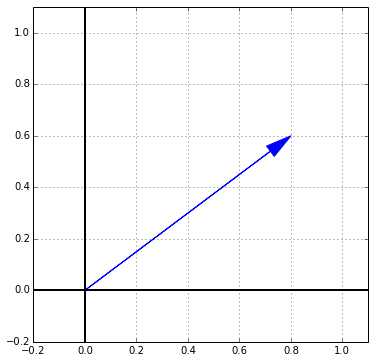

In [3]:
from matplotlib.font_manager import FontProperties

fig1=plt.figure(figsize=(6.0,6.0))
plt.xlim(-0.2, 1.1)
plt.ylim(-0.2, 1.1)
plt.grid(True)
plt.axhline(linewidth=2.0, color="black")
plt.axvline(linewidth=2.0, color="black")
font = FontProperties()
font.set_size(30)
x = np.array([0.0,0.8])
y = np.array([0.0,0.6])
plt.arrow(x[0],y[0],x[1],y[1],head_width=0.05, head_length=0.1,length_includes_head=True, color='b', clip_on=False)
plt.show()

The numbers $x_1, x_2$ etc. are called the *elements* of the vector $\bfx$. 
When the vector has is defined in some space, the first element usually corresponds to the $x$- the second to the $y$ and (in the 3D case) the third to the $z$-axis. 

We can add two vectors and multiply a vector by a number: If we take
$\bfa = (a_1, \ldots , a_N)$ and $\bfb = (b_1, \ldots , b_N)$ and two numbers $\lambda$ and $\mu$ (real or complex),
then
$$
\lambda \bfa + \mu \bfb = \left( \lambda a_1 + \mu b_1, \ldots, \lambda a_j + \mu b_j, \ldots, \lambda a_N + \mu b_N\right).
$$
Geometrically, the addition of two vectors reduces to a parallelogram construction. Furthermore, $\bfa - \bfb$ is a 
vector which is parallel to and has the same length as a line segment running from the end point of $\bfb$ to that of $\bfa$.

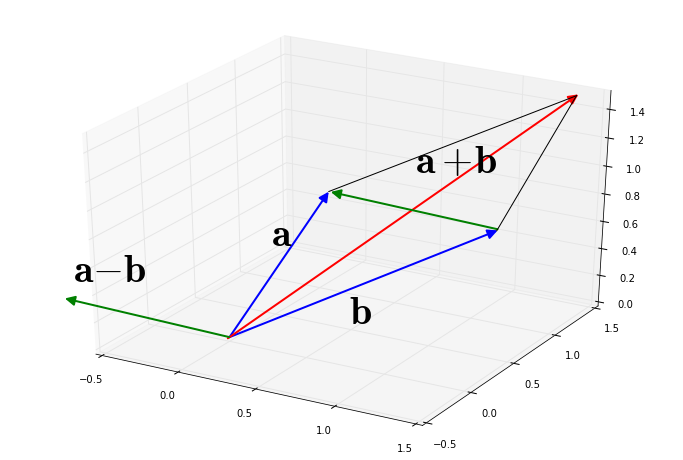

In [4]:
from matplotlib.font_manager import FontProperties
from mpl_toolkits.mplot3d import proj3d

from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(12.0, 8.0))
ax = fig.gca(projection='3d')
ax.set_xlim([-0.5,1.5])
ax.set_ylim([-0.5,1.5])
ax.set_zlim([0.0,1.5])

font.set_size(40)
ax.text(0.1, 0.3, 0.58,'${\\bf a}$',fontproperties=font)
ax.text(0.6, 0.3, 0.12,'$\\bf b$',fontproperties=font)
ax.text(0.9, 0.5, 1.2, '$\\bf a+b$',fontproperties=font)
ax.text(-1.4, 0.5, -0.1, '$\\bf a-b$',fontproperties=font)
vecA = [0.3, 0.6, 0.9]
vecB = [1.2, 0.9, 0.7]
vecC = [1.5, 1.2, 1.6]
vecD = [-0.9, -0.3, 0.2]
ax.plot([0.3,1.5], [0.6, 1.2], [0.9, 1.6], color='black')
ax.plot([1.2,1.5], [0.9, 1.2], [0.7, 1.6], color='black')
delta = 0.01
a = Arrow3D([-delta*vecA[0], (1+delta)*vecA[0]], [-delta*vecA[1], (1+delta)*vecA[1]], [-delta*vecA[2], (1+delta)*vecA[2]], mutation_scale=20, lw=2, arrowstyle="-|>", color="blue")
b = Arrow3D([-delta*vecB[0], (1+delta)*vecB[0]], [-delta*vecB[1], (1+delta)*vecB[1]], [-delta*vecB[2], (1+delta)*vecB[2]], mutation_scale=20, lw=2, arrowstyle="-|>", color="blue")
c = Arrow3D([-delta*vecC[0], (1+delta)*vecC[0]], [-delta*vecC[1], (1+delta)*vecC[1]], [-delta*vecC[2], (1+delta)*vecC[2]], mutation_scale=20, lw=2, arrowstyle="-|>", color="red")
d = Arrow3D([-delta*vecD[0], (1+delta)*vecD[0]], [-delta*vecD[1], (1+delta)*vecD[1]], [-delta*vecD[2], (1+delta)*vecD[2]], mutation_scale=20, lw=2, arrowstyle="-|>", color="green")
e = Arrow3D([(1+delta)*vecB[0], (1)*vecA[0]], [(1+delta)*vecB[1], (1)*vecA[1]], [(1+delta)*vecB[2], (1)*vecA[2]], mutation_scale=20, lw=2, arrowstyle="-|>", color="green")
# ax.plot(X[1:], Y[1:], Z[1:], lw=3, color='black')
ax.add_artist(b)
ax.add_artist(a)
ax.add_artist(c)
ax.add_artist(d)
ax.add_artist(e)
plt.show()

There exist special vectors, $\hat{\bfe}_1 = \left( 1, 0, \ldots, 0\right)$, $\hat{\bfe}_2 = \left( 0, 1, \ldots, 0\right)$ etc., called *unit vectors*. Any vector can be expressed in terms of these unit vectors:
$$ \bfa = (a_1, a_2, \ldots, a_N) = a_1 \hat{\bfe}_1 + \ldots + a_N \hat{\bfe}_N.
$$

The *length*, or *norm* of a vector is the square root of the sum of the squares of its elements. The length of a vector $\bfa$ is denoted as $|\bfa|$ or $a$:
$$
|\bfa| = a = \sqrt{|a_1|^2 + |a_2|^2 + \ldots + |a_N|^2} = \sqrt{\sum_{j=1}^N |a_j|^2}
$$
where $|a_j|^2$ is the complex norm.

The *null vector* is the vector with all elements equal to zero:
$$
{\rm null~~ vector} = (0,0,\ldots,0)$$

##Multiplying vectors
Vectors can be multiplied by a number as we've just seen. It is also possible to define products of two vectors. There exist two such products, the dot product and the cross product.

The *dot product* of two vectors $\bfa$ and $\bfb$ with elements $a_j$ and $b_j$ respectively, is defined as
$$
\bfa \cdot \bfb = a^*_1 b_1 + \ldots + a^*_j b_j + \ldots a^*_N b_N
$$
where $a_j^*$ denotes the complex conjugate of $a_j$.
We can then see that $|a|^2 = a^2 =\bfa \cdot \bfa$. Furthermore, $$\bfa\cdot\bfb = (\bfb \cdot \bfa)^*$$. 

For the unit vectors, defined above, we have
$$
\hat{\bfe}_j \cdot \hat{\bfe}_k = \delta_{jk}$$
where the *Kronecker delta*, $\delta_{jk}$ equals 0 for $j \neq k$ whereas $\delta_{jj} = 1$ for all $j=1,\ldots, N$.
It is easy to verify that $a_j = \hat{\bfe}_j \cdot \bfa$.

For *real* vectors in two and three dimensions, it can be shown that 
$\bfa \cdot \bfb = a b \cos(\theta)$ where $\theta$ is the angle between the two vectors. This can easily be demonstrated using the cosine rule for the triangle spanned by $\bfa$ and $\bfb$. In fact, this rule says that 
$$
|\bfa - \bfb|^2 = (\bfa - \bfb) \cdot (\bfa - \bfb) = a^2 - 2 \bfa \cdot \bfb + b^2 = a^2 + b ^2 - 2 ab \cos\theta
$$
from which indeed it follows immediately that $\bfa \cdot \bfb = a b \cos(\theta)$.

The other type of product is the cross product. We shall discuss this product only for the case of real vectors in 3D. The cross product 
$\bfa \times \bfb$ of two vectors $\bfa$ and $\bfb$ is a vector which is defined as
$$
\bfa \times \bfb = \left( a_2 b_3 - b_2 a_3 , a_3 b_1 - b_3 a_1, a_1 b_2 - b_1 a_2\right).
$$
It is easy to verify that $\bfa \cdot (\bfa \times \bfb) = \bfb \cdot (\bfa \times \bfb)$ = 0. The $\cos\theta$ of the 
inner product must therefore vanish, implying that the cross (or 'vector') product of two vectors is perpendicular to those two vectors. 

So what about its length? From the expression on the right hand side, it can immediately be seen that the length of the 
cross product is proportional to the length of the two vectors $\bfa$ and $\bfb$. It turns out that there is an extra factor $\pm \sin\theta$, where the plus or minus sign is determined by the right hand rule: When we turn (in front of us) from $\bfa$ to $\bfb$ in the clockwise direction, $\bfa \times \bfb$ points away from us (anti-clockwise means that $\bfa \times \bfb$ points toward us). We shall soon show the validity of these statements concerning length and orientation.

First we note that $\bfa \times \bfb = - \bfb \times \bfa$, i.e. the cross product *anti-commutes*. Furthermore it is bi-linear in $\bfa$ and $\bfb$:
$$
\left(\lambda \bfa_1 + \mu \bfa_2\right) \times \bfb = \lambda \bfa_1 \times \bfb + \mu \bfa_2 \times \bfb
$$ and similar for $\bfb$. 
If $\bfa = \lambda \bfb$, it can easily be shown from its definition that the cross product vanishes. 

Now let's assume that the cross product $\bfa\times \bfb$ be *defined* as the vector perpendicular to $\bfa$ and $\bfb$ with length $ab \sin\theta$, perpendicular to $\bfa$ and $\bfb$ and oriented according to the right hand rule. We then have:
$$ \bfe_1 \times \bfe_2 = \bfe_3; \; \; \; \bfe_2 \times \bfe_3 = \bfe_1; \; \; \; \bfe_3 \times \bfe_1 = \bfe_2.
$$
Using the fact that $\bfa = a_1 \bfe_1 + a_2 \bfe_2 + a_3 \bfe_3$ it is easy to derive the original definition in terms of the vector elements, by which the equivalence of the two definitions is established.

In summary: 
1. The inner product of two vectors $\bfa$ and $\bfb$ is a scalar with the value  
$$ \bfa \cdot \bfb  = \sum_{j=1}^N a^*_j b_j.$$ For real vectors, the same value can be found as
$$ \bfa \cdot \bfb = a b \cos(\theta) $$ where $\theta$ is the angle between $\bfa$ and $\bfb$.
2. The cross product in 3D of two real vectors, $\bfa$ and $\bfb$, is found as 
$$
\bfa \times \bfb = \left( a_2 b_3 - b_2 a_3 , a_3 b_1 - b_3 a_1, a_1 b_2 - b_1 a_2\right).
$$
This is a vector which is perpendicular to both $\bfa$ and $\bfb$, oriented according to the right hand rule, and with length $ab\sin\theta$.  

For completeness, we mention two properties related to the inner product: the *triangle inequality*
$$
\left| \bfa + \bfb \right| \leq a + b
$$
and *Schwarz' inequality*
$$
\left| \bfa \cdot\bfb\right|^2 \leq a^2 b^2.
$$

#Mapping vectors -- matrices
Suppose we rotate a vector in a plane over an angle $\varphi$. Then the vector will change its components. The question we ask ourselves is whether we can express the new vector elements easily in terms of the original ones. 

To answer this question in the affirmative, we need to restrict ourselves to so-called *linear* mappings. Suppose that any  vector $\bfa$ maps under the transformation ${\mathcal M}$ onto a new vector $\bfa'$, then a linear mapping satisfies:
$$
{\mathcal M} : \lambda \bfa + \mu \bfb  \rightarrow \lambda \bfa' + \mu \bfb'. 
$$
Therefore, if we know how the unit vectors transform under ${\mathcal M}$, we can easily find how any vector transforms 
under ${\mathcal M}$, as any vector is a linear combination of the unit vectors). 

Let us now collect the components of the *transformed* unit vectors $\bfe_j$, $j=1, \ldots, N$ into a *matrix* $M$:
$$
\begin{pmatrix} e'_{11} & e'_{12} & \ldots & e'_{1N} \\
e'_{21} & e'_{21} & \ldots & e'_{2N} \\
\vdots & \vdots & \vdots & \cdots \\
e'_{N1} & e'_{N2} & \ldots & e'_{NN} \end{pmatrix}
$$
Here, $M_{jk} = e'_{jk}$ is the $j$-th element of the image of the vector $\bfe_k$ after ${\mathcal M}$ has acted on it. 
Quite generally, the element $M_{jk}$ is the one in the $j$-th row and the $k$-th column.

We furthermore introduce the matrix-vector product, the result of which is stored into a new vector. We use upper case boldface for matrices, that is, $\bf M$ denotes a matrix. 
Then 
$$
\bf M a = a'.
$$
The $j$-th element of $\bfa$ is calculated as the inner product of the $j$-th row (viewed as a vector) of $\bf M$ with 
$\bfa$. 

An example:
$$
\begin{pmatrix} 1 & 2 & 3 \\
                 4 & 5 & 6 \\
                5 & 10 & 20 \end{pmatrix}
\begin{pmatrix} 3 \\ 2 \\ 1 \end{pmatrix} = 
\begin{pmatrix} 10 \\ 28 \\ 55 \end{pmatrix}.
$$
Viewing the matrix in this example as representing a mapping, we see that the vector $\hat{\bfe}_1$ is mapped onto
$$
\begin{pmatrix} 1 \\ 4 \\ 5 \end{pmatrix}
$$ etcetera (i.e. the columns of $\bfM$ represent the images of the unit vectors. 

Instead of a matrix with the same number of columns and rows, we have also matrices where these numbers differ.
If the number of columns equals the number of rows, the matrix is called *square*. Here we shall restrict ourselves to square matrices. 

#Matrix multiplication - The matrix inverse
Two square matrices can be multiplied. The result is a matrix which has on position $jk$ the inner product of the 
$j$-th row of the first matrix and the $k$-th column of the second one. Example:
$$
\begin{pmatrix} 1 & 2 & 3 \\
                 4 & 5 & 6 \\
                5 & 10 & 20 \end{pmatrix}
\begin{pmatrix} 3& 2 & 1 \\
                 5 & 5 & 0 \\
                3 & 3 & -10 \end{pmatrix} = 
\begin{pmatrix}   22 &  21 & -29 \\
   55 &  51 & -56 \\
  125 & 120 & -195 \end{pmatrix}   
$$
The result of a matrix multiplication is not the same when the two matrices are reversed. This property is formulated as *non-commutativity* of the matrix multiplication:
$$
\bfA \bfB = \bfB \bfA {\rm ~~ usually ~~ does ~~NOT ~~hold}.
$$

The *diagonal* of a matrix $\bfA$ is formed by the elements $A_{jj}$: 
$$
\begin{pmatrix} \bfA_{11} & A_{12} & \ldots & A_{1N} \\
A_{21} & \bfA_{22} & \ldots & A_{2N} \\
\vdots & \vdots & \vdots & \vdots \\
A_{N1} & A_{N2} & \ldots & \bfA_{NN}\end{pmatrix}
$$
where boldface has been used to highlight the diagonal elements. 

The *unit matrix* is a matrix with elements $1$ on the diagonal and $0$ outside:
$$
\bfI =
\begin{pmatrix} 1 & 0 & \ldots & 0 \\
0 & 1 & \ldots & 0 \\
\vdots & \vdots & \vdots & \vdots \\
0 & 0 & \ldots & 1 \end{pmatrix}
$$  
Multiplying any matrix by the unit matrix leaves that matrix unchanged:
$$
\bfA \bfI = \bfI \bfA = \bfA.
$$
The *inverse* of a matrix $\bfA$ is another matrix $\bfA^{-1}$ which, when multiplied by $\bfA$, yields the unit matrix:
$$
\bfA \bfA^{-1} = \bfI.
$$
From this definition we see that
$$
\bfA = (\bfA \bfA^{-1}) \bfA = \bfA (\bfA^{-1} \bfA),
$$
so $$\bfA^{-1} \bfA = \bfA \bfA^{-1} = \bfI.$$

#Matrices and linear equations
Linear equations can be cast into matrix-vector formulas:
$$
\bfA \bfx = \bfb.
$$
Here, the elements of the vector $\bfx$ are the unknowns, and $\bfA$ and $\bfb$ are a given matrix and vector respectively. Writing this out row by row indeed gives us $N$ equations with $N$ variables. Without giving proofs, we quickly review the properties of such a system. 

There are either $0$, $1$, or an infinite number of solutions. Which particular case we are in depends on whether the *rank* of the matrix is $N$ or less. The rank is the dimension of the space spanned by the images of $all$ vectors when acting on them with $\bfA$. Consider for example a projection of the 3D space on a plane. 
This is a linear transformation. Obviously if we subject all points in 3D to this projection, they end up on the projection plane which is 2D. Hence the rank of the projection is 2. 
If $\bfb$ lies on the projection plane, then there are infinitely many vectors being projected onto $\bfb$. If $\bfb$ 
lies outside the projection, no points will be projected onto it. So the rule is
1. For a system of $N$ linear equations of $N$ variables, there is only 1 solution if the rank of the matrix $\bfA$ is $N$.
2. If the rank of $\bfA$ is less than $N$, the number of solutions is either 0 or $\infty$. 

This system of equations can be solved using a process called *Gauss elimination*. This is based on the following obvious properties of linear equations:
1. Swapping two arbitrary equations (and the elements of the vector $\bfx$) does not change the solution of the system. 
2. We can multiply the left and right hand side of any of the equation by a constant factor, without affecting the solution.
3. We can replace an equation by its difference with another equation.

Applying these rules to the problem 
$$
\begin{pmatrix} 1 & 2 & 3 \\
                 4 & 5 & 6 \\
                5 & 10 & 20 \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} = \begin{pmatrix} 10 \\ 28 \\ 55 \end{pmatrix}
$$
we proceed as follows. 
$$
\begin{pmatrix} 1 & 2 & 3 \\
                4 & 5 & 6 \\
                5 & 10 & 20 \end{pmatrix} 
\begin{pmatrix} 10 \\ 28 \\ 190 \end{pmatrix} \rightarrow 
\begin{pmatrix} 1 & 2 & 3 \\
                4 & 5 & 6 \\
                0 & 0 & 5 \end{pmatrix} 
\begin{pmatrix} 10 \\ 28 \\ 5 \end{pmatrix} .
$$
Here we have multiplied the first row by 5 and subtracted the result from the last row.
Now we continue with the second row:
$$
\begin{pmatrix} 1 & 2 & 3 \\
                4 & 5 & 6 \\
                0 & 0 & 5 \end{pmatrix} 
\begin{pmatrix} 10 \\ 28 \\ 5 \end{pmatrix} \rightarrow 
\begin{pmatrix} 1 & 2 & 3 \\
                0 & -3 & -6 \\
                0 & 0 & 5 \end{pmatrix} 
\begin{pmatrix} 10 \\ -12 \\ 5 \end{pmatrix} .
$$
Now we can solve for $\bfx$, starting with the last line:
$5 x_3 = 5$, so $x_3 = 1$. Then we use this in solving for $x_2$ in the second line:
$-3 x_2 - 6 = -12$, hence $x_2 = 2$. Finally, the first line can be used to find $x_1$:
$x_1 +2\cdot 2 + 3\cdot 1 = 10$, so $x_1 = 3$. We know that this solution is correct from the previous paragraph.

The aim is always to bring the matrix to *echelon* from, in which the lower triangle of the matrix is zero. In addition to the operations used in this example, rows can be swapped if you get stuck in the process.


#Rank and determinant -- Inverting a matrix
We have seen that the rank of $\bfA$ plays a very important role in the analysis of systems of linear equations. It turns out that this rank is related to the number of vectors of $\bfA$ which are themselves not the null vector and which are mapped onto the null vector when acting on them with $\bfA$. Together, all the vectors which are mapped onto the null vector form the *kernel* of the matrix $\bfA$. Denoting the dimension of the kernel by $K$, we have
$$
{\rm rank} = N - K.
$$

To check whether the kernel consists of just the null vector, we can check the *determinant*, denoted by det$(\bfA)$ or $|\bfA|$.
For a matrix $\bfA$ with elements $A_{jk}$, the determinant is defined as
$$
{\rm det}(\bfA) = \left| \bfA \right| = \sum_{P} \epsilon_P \prod_j A_{j P_j}.
$$
This requires some explanation. The sum on the right hand side is over *all* permutations *P* of the sequence $1, 2, \ldots, N$. For such a permutation $\epsilon_P$ is the *sign* of that permutation, i.e. $\epsilon_P = \pm 1$ where the $+1$ means that $P$ is composed of an *even* number of transpositions (a transposition is an exchange of two numbers); $-1$ is reserved for an odd number of transpositions. 

In practice, the determinant is determined according to the following procedure. 
1. For a $2\times 2$ matrix, the determinant is 
   $$ \begin{vmatrix} a & b \\
                             c & d \end{vmatrix} = ad - bc. $$
2. For a $3\times 3$ matrix, we first define the *sub-determinant* $\left|A(j,k)\right|$, which is the determinant 
of the matrix with the $j$-th row and the $k$-th column left out. Then for the $3\times 3$ matrix $\bfA$, the determinant is found as 
$$|\bfA| = A_{11} |\bfA(1,1)| - A_{12} |\bfA(1,2)| + A_{13} |\bfA(1,3)|.$$
As the subdeterminants are $2\times 2$, we can evaluate them using the rule 1.
The rule given here is based on the first row. The first column can also be used in the same way, with the same result, and also other than the first columns and rows can be used.

This procedure for evaluating determinants is generalized in the obvious way to higher-dimensional matrices. The upper left element $(1,1)$ is always taken with a $+$ sign, and the other elements with a $+$ or $-$, according to the checkerboard pattern.

The determinant tells us whether the rank of the matrix is $N$ or small than $N$. When $|\bfA=0|$, the rank of the matrix is smaller than $N$, in other words, there exists a non-null vector which is mapped onto the null vector by $\bfA$. 

Determinants and subdeterminants can be used to calculate the inverse of a matrix: replace each element $jk$ of a matrix by its subdeterminant multiplied by $(-1)^{j+k}$ and multiply the resulting matrix by the inverse of the determinant of the original matrix. Taking the transpose of the result then yields the inverse of the original matrix.

As an example, we calculate the inverse of the matrix
$$\begin{pmatrix} 0 &  1 & 0 \\
                  1 & -2 & 1 \\
                  1 &  1 & -1\end{pmatrix} 
$$
Putting the subdeterminants on each entry, we obtain
$$\begin{pmatrix} 1 & -2 & 3 \\
                 -1 &  0 & -1 \\
                  1 &  0 & -1\end{pmatrix}.
$$
Now we flip the signs on each site $jk$ where $j+k$ is odd:
$$\begin{pmatrix} 1 & 2 & 3 \\
                  1 &  0 & 1 \\
                  1 &  0 & -1\end{pmatrix}.
$$
The determinant of the original matrix is calculated to be $2$, so multiplying by the inverse of this, we have
$$\begin{pmatrix} 1/2 & 1 & 3/2 \\
                   1/2 & 0 &  1/2 \\
                  1/2 & 0 &  -1/2\end{pmatrix}.
$$
The transpose of this matrix: 
$$\begin{pmatrix} 1/2 & 1/2 & 1/2 \\
                   1 & 0 &  0 \\
                  3/2 & 1/2  &  -1/2\end{pmatrix}
$$
is then the inverse of the original matrix,
as can be checked by multiplying this matrix by the original one.


#Different types of matrices

Matrices can be real or complex. We define the *transpose* $\bfA^T$ of a matrix $\bfA$ with elements $A_{jk}$ as the matrix with elements $A_{kj}$. In words, this means that we mirror the matrix elements with respect to the diagonal.

Example: 
$$
\bfA = \begin{pmatrix} 1 & 2 & 3 \\
                 4 & 5 & 6 \\
                5 & 10 & 20 \end{pmatrix} \rightarrow 
\bfA^T = \begin{pmatrix} 1 & 4 & 5 \\
                 2 & 5 & 10 \\
                3 & 6 & 20 \end{pmatrix}.
$$

The complex conjugate $\bfA^*$ of a matrix $\bfA$ is obtained from $\bfA$ by taking the complex conjugate of each element. 

The *hermitian conjugate* $\bfA^\dagger$ (very important for quantum mechanics!) of a matrix $\bfA$ is the complex conjugate of the transpose of $\bfA$, i.e. $$\bfA^\dagger = \left(\bfA^*\right)^T.$$
For the matrix elements of $\bfA$ this means that
$$ A^\dagger_{jk} = A^*_{kj}.
$$


#Notations
Matrices are rather bulky when writing them out. It is often convenient to write matrix-matrix and matrix-vector products as sums over indices. For example, for $\bfC = \bfA \bfB$, we may write
$$C_{jk} = \sum_{l=1}^M A_{jl} B_{lk},
$$
where $j$ and $k$ can be taken to be in $1, \ldots, N$.
For $\bfC = \bfA^\dagger \bfB$, we obtain
$$
C_{jk} = \sum_l A^*_{lj} B_{lk}.
$$
a matrix vector product like $\bfA \bfx = \bfb$ is
$$
\sum_k A_{jk} x_k = b_j.
$$


#Eigenvectors and diagonalization
In quantum mechnics and in the analysis of vibrations of classical systems, we are facing the problem of finding *eigenvectors* - vectors which have the property
$$
\bfA \bfa = \lambda \bfa,
$$
i.e., after acting on a vector $\bfa$ with the matrix $\bfA$, we obtain that vector multiplied by the scalar $\lambda$. This $\lambda$ is called *eigenvalue* and $\bfa$ is called the *eigenvector* corresponding to $\lambda$. 

Finding the eigenvectors and eigenvalues of a matrix is called the *eigenvalue problem*. So how do we find the eigenvalues?
Well, casting the eigenvector equation into the form
$$
(\bfA -\lambda \bfI) \bfa = 0,
$$
we see that the matrix $\bfA - \lambda \bfI$ must have a nontrivial vector which is mapped onto the null vector. As we have stated above, this can only be the case when $|\bfA - \lambda \bfI| = 0$. This condition leads to a polynomial
equation of order $N$ in $\lambda$ - it is called the *characteristic equation*. Solving this, we find all the eigenvalues $\lambda$. For each such eigenvalue we can find the eigenvector $\bfa$ by solving the set of homogeneous equations
$$
(\bfA -\lambda \bfI) \bfa = 0,
$$
which is possible since $\lambda$ is now known.

A very important note is that the evaluation of $\lambda$ can only be performed for $N=1$ (trivial case) $2$ or $3$. For larger $N$, this can only be done for special cases. Therefore, we use computers for numerical evaluation of the 
eigenvalues and vectors. 

For small matrices, you can often guess the form of the eigenvectors. If you can indeed guess one, you are often done. For example, the matrix 
$$
\begin{pmatrix} a & b \\ b & a \end{pmatrix} $$ is symmetric when we exchange the numbering of the components $1\leftrightarrow 2$. So we may guess that an eigenvector is $(1, 1)$ (symmetric). Let us then also try the anti-symmetric vector $(1, -1)$; this is also an eigenvector! As we had a $2\times 2$ matrix, we have found *all* the eigenvectors.

#Basis transformation
Suppose we have a matrix which expresses a linear transformation. The columns of the matrix represent the images of the unit vectors, expressed in terms of the unit vectors. The unit vectors all have length 1 and they form an orthogonal set, i.e. 
$$
\hat{\bfe}_j \cdot \hat{\bfe}_k = \delta_{jk}.
$$
Such a basis is called *orthonormal*.
Now suppose that we perform a basis transformation, which transforms this basis into another orthonormal basis $\hat{\bfe}'_j$. Such a transformation can be encoded into a matrix whose columns are the new orthonomal basis vectors. Such a marix is called *unitary*. We call $\bfU$ the matrix whose columns are the *new* basis vectors: $\hat{\bfe}'_j$. is the $j$-th column of $\bfU$. It can easily be verified from the orthonormality of this new basis that the inverse of
$\bfU$ is $\bfU^\dagger$.
> A unitary matrix satisfies
$\bfU \bfU^\dagger = \bfU^\dagger \bfU = \bfI.
$

The fact that the columns of the matrix $\bfU$ form the 'new' basis can be expressed as 
$$
\left(\hat{\bfe}'_k\right)_l = U_{lk}.
$$
Note that $\left(\hat{\bfe}'_k\right)_l$ is the $l$-th element of the vector $\hat{\bfe}'_k$.

The relation between the 'old' and 'new' basis can expressed in terms of the dot products between them:
$$
\hat{\bfe}'_k \cdot \hat{\bfe}_j.
$$
The result whould be the conjugate of the $j$-th component of $\hat{\bfe}'_k$, which, as we have just seen, is $U^*_{jk}$.
Therefore we see that
$$
a'_k = \hat{\bfe}'_k \cdot \bfa = \sum_l U^*_{jk} a_j = \left( \bfU^\dagger \bfa\right)_k.
$$
This says that the matrix $\bfU$ can be used to express vectors in terms of the new basis.
This equation can be inverted:
$$
a_k = \left(\bfU \bfa'\right)_k.
$$

A matrix $\bfA$ is characterised by its elements $A_{jk}$. These elements can be found as
$$
A_{jk} = \hat{\bfe}_j \cdot \bfA \hat{\bfe}_k.
$$
Transforming to the new basis leads to new matrix elements $A'{jk}$ which become
$$
A'_{jk} = \hat{\bfe}'_j \cdot \bfA \hat{\bfe}'_k = \left(\bfU^\dagger \hat{\bfe}_j \right)\cdot \bfA \left(\bfU^\dagger \hat{\bfe}_k \right) = \sum_{mn} U_{jm} A_{mn} U^*_{nk} = \left(\bfU \bfA \bfU^\dagger\right)_{jk}.
$$



#Problems
1. Calculate $\bfA \bfv$ for
$$ \begin{pmatrix} 1 & 2+\ii & 0 \\
                   2+\ii & 3 & 2 \\
                   0 & 2 & 1
   \end{pmatrix}$$ and
   $$\bfv = \begin{pmatrix} 4 \\ 2-\ii \\1 + \ii\end{pmatrix}$$.
2. Calculate the products $\bfA \bfB$ and $\bfB \bfA$  of the two matrices:
$$ \bfA =  \begin{pmatrix} 1 & 2+\ii & 0 \\
                   2+\ii & 3 & 2 \\
                   0 & 2 & 1
   \end{pmatrix} ~~{\rm  and }~~
   \bfB =  \begin{pmatrix} 1 & -1 & 1 \\
                   2 & 0 & 2 \\
                   1 & -1 & 1
   \end{pmatrix}.
$$
3. Show that for two square matrices,  $(\bfA \bfB)^T = \bfB^T \bfA^T$. 
4. Calculate the following determinant.
$$ \begin{vmatrix} 1 & 2 & 0 \\
                   0 & 3 & 2 \\
                   1 & 0 & 1.
   \end{vmatrix}$$
   Also calculate the inverse. 
5. Same question for 
$$ \begin{vmatrix} 1 & 3 & 3 \\
                   1 & 2 & 2 \\
                   3 & 5 & 5.
   \end{vmatrix}$$
   Can you explain why you obtain this result? Hint: think about the rank. 
   Find a nontrivial (i.e. on-null vector) which, when acted on by this matrix, yields the null vector.
6. Find out whether the following matrix is Hermitian or symmetric or none of both.
$$ \begin{pmatrix} 1 & 2+\ii & 0 \\
                   2+\ii & 3 & 2 \\
                   0 & 2 & 1.
   \end{pmatrix}$$
7. Same question for 
$$ \begin{pmatrix} 1 & 2-\ii & 0 \\
                   2+\ii & 3 & 2+\ii \\
                   0 & 2-\ii & 1.
   \end{pmatrix}$$
8. Find the eigenvectors and eigenvalues of the matrix in the previous exercise.
9. Calculate the eigenvectors of the matrix 
$$ \bfA = \begin{pmatrix} 0 & 0 & 1 \\
                   0 & 1 & 0 \\
                   1 & 0 & 0 \end{pmatrix} $$
Same question for 
$$
\bfB = \begin{pmatrix} 0 & -\ii & -\ii \\
                   \ii & 0 & -\ii \\
                   \ii & \ii & 0 \end{pmatrix} $$
Also calculate $\bfA \bfB$ and $\bfB \bfA$. 
10. Show that the quadratic from
$$ x^2 + 8xy + y^2$$
can be written in the form
$$ (x, y) \begin{pmatrix} 1 & 2 \\
                           2 & 1 \end{pmatrix} \begin{pmatrix}x\\ y\end{pmatrix}.
$$
Next, diagonalize the matrix in this expression. Express the $x$ and $y$ in terms of the eigenvectors and reformulate the
quadratic form in terms of these eigenvectors.
11. Solve the system of linear equations
$$ 3x + 2y + 2z = 9 \\
   x + 2y + z = 6 \\
   -x + 6y + z = 4
$$
by Gaussian elimination.
12. Same question for
$$ 2x + y + 2z = 10 \\
   2x - y - 4z = 0 \\
   x + 4y - 3z = 8.
$$
13. Same question for
$$ 2x + y + 2z = 10 \\
   x - y - 4z = 0 \\
   x + 2y + 6z = 10.
$$
14. Same question for
$$ 2x + y + 2z = 10 \\
   x - y - 4z = 0 \\
   x + 2y + 6z = 8.
$$
15. Consider the three matrices
$$ J_x = \frac{1}{\sqrt{2}} \begin{pmatrix} 0 & 1 & 0 \\
                                            1 & 0 & 1 \\
                                            0 & 1 & 0 \end{pmatrix}
 J_y = \frac{1}{\sqrt{2}} \begin{pmatrix} 0 & -\ii & 0 \\
                                          \ii & 0 & -\ii \\
                                          0 & \ii & 0 \end{pmatrix}
  J_z =  \begin{pmatrix} 1 & 0 & 0 \\
                                          0 & 0 & 0 \\
                                          0 & 0 & -1 \end{pmatrix}
 $$
 Calculate the commutators $[J_x, J_y]$, $[J_y, J_z]$ and $[J_z, J_x]$.
16. Calculate the eigenvalues and - vectors of the three matrices of the previous problem. Check that these vectors rae orthogonal.